In [131]:
import sys
import importlib as imp
sys.path.insert(0, r"C:\users\pairwin\Documents\Github\HelperPI")
#sys.path.insert(0, r'/home/pirwin/Git/HelperPI')
#imp.reload(HelperPI)
import HelperPI
import itertools
import seaborn as sns
import pandas as pd
import scipy.stats as stats
from scipy.special import inv_boxcox
from scipy.stats.distributions import uniform, lognorm
import matplotlib.pyplot as plt
import matplotlib
import statsmodels.formula.api as sts
import numpy as np
import math
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
#from sklearn.preprocessing import Imputer, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV, cross_val_score, RandomizedSearchCV
#from sklearn.externals import joblib
from sklearn.preprocessing import StandardScaler, Normalizer, RobustScaler
from scipy import interp
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression, LassoLars, HuberRegressor, ElasticNet, Ridge
from sklearn.svm import LinearSVR
from sklearn.kernel_ridge import KernelRidge
from time import time
from sklearn.neural_network import MLPRegressor
from sklearn.feature_selection import SelectKBest, f_regression

In [132]:
%matplotlib inline

matplotlib.rcParams['figure.figsize'] = (11,8)

pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 999

In [133]:
helper = HelperPI.Helper()

INFO:root:Initializing...


In [134]:
impdata = pd.read_excel(r'B:\Phillip\Mapping\CBSA_Analysis\Modeling\ModelDataV4.xlsx')

In [157]:
mean = np.mean(impdata['TARGET_SALESPOS'])
std = np.std(impdata['TARGET_SALESPOS'])
mean, std

base = impdata[impdata['TARGET_SALESPOS'] < mean+std*2]

base['TARGET_SALESPOS_CBRT'] = np.cbrt(base['TARGET_SALESPOS'])

#base['TARGET_SALESPOS_LOG'] = np.log(base['TARGET_SALESPOS'])

#base['SALES_TARGET_N12_CBRT'], lmda = stats.boxcox(base['SALES_TARGET_N12'])
base.describe()

,STORE_ID,TARGET_SALESPOS,AVG_HH_SIZE,BPS_CAB,BPS_IND,DICKS,DIVIND,MEDAGE,MEDDISINC_2018,PCAP_AFFH_NAICS,PCAP_CC_DEBT,PCAP_CONTR_POL,PCAP_CONTR_RELIG,PCAP_OUTDOOR_SPEND,PCAP_PART_WAVG,PCAP_RTS_NAICS,PCT_CONS_MEDIA,PCT_HH_FOODSTAMPS,PCT_HH_LOW_INCOME,PCT_HH_TRK_OR_ATV,PCT_HS_DIPLOMA,PCT_MARRIED,PCT_PROB_REPUB,POPGRWTH,SCHEELS,SPORTS_WHSE,SQMI_PARKS,SQMI_WATER,TOTHH_2018,TOTPOT_2018,WALMART_SUPERCENTERS,STORE_SQFT,TARGET_SALESPOS_CBRT
count,145.000000,1.450000e+02,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,1.450000e+02,1.450000e+02,145.000000,145.000000,145.000000
mean,240.862069,2.116031e+07,2.554138,0.386207,0.510345,3.289655,54.001379,37.789655,48095.234483,0.204390,219.252497,6.433489,362.677327,3998.839761,4.187792,17.167279,0.234116,0.122783,0.241297,0.302753,0.148870,0.396349,0.495231,0.992207,0.124138,0.400000,848.239918,14.013517,4.661293e+05,1.233562e+06,11.337931,92331.986207,273.506107
std,202.493883,6.643102e+06,0.185800,0.636682,0.501626,2.753577,16.478778,3.406932,7536.624292,0.336123,35.009381,1.298732,49.256217,725.653348,0.567886,2.587420,0.032008,0.037916,0.049325,0.059159,0.031060,0.028427,0.029475,0.657121,0.330882,0.802773,1911.530532,24.040859,3.707237e+05,1.006624e+06,8.514873,54039.678493,29.351320
min,3.000000,9.598016e+06,2.280000,0.000000,0.000000,0.000000,15.900000,29.200000,32924.000000,0.012742,107.956969,3.468858,199.310225,1786.632681,2.653688,9.478178,0.156947,0.040331,0.077201,0.188145,0.086969,0.321826,0.389679,-0.420000,0.000000,0.000000,0.000000,0.000000,6.276000e+03,1.449800e+04,0.000000,24523.000000,212.517071
25%,40.000000,1.617908e+07,2.430000,0.000000,0.000000,1.000000,44.100000,35.700000,42888.000000,0.050127,195.425005,5.522277,331.633499,3560.773041,3.797422,15.814347,0.213399,0.095727,0.210926,0.265665,0.127577,0.380102,0.481414,0.480000,0.000000,0.000000,2.506550,0.000000,1.586030e+05,4.185510e+05,6.000000,53319.000000,252.920834
50%,92.000000,2.028905e+07,2.520000,0.000000,1.000000,3.000000,56.000000,37.400000,46719.000000,0.094096,215.521471,6.153438,357.883913,3888.557042,4.150461,16.902252,0.231863,0.119451,0.242502,0.289211,0.142238,0.392778,0.493176,1.000000,0.000000,0.000000,20.257820,4.430000,3.716910e+05,9.512320e+05,10.000000,78956.000000,272.743197
75%,443.000000,2.595933e+07,2.620000,1.000000,1.000000,5.000000,64.900000,39.400000,51466.000000,0.192881,239.630634,7.215735,392.702153,4410.169969,4.498188,18.454695,0.253373,0.140591,0.277821,0.324863,0.168920,0.412891,0.509372,1.460000,0.000000,1.000000,189.652110,15.580000,6.892700e+05,1.781417e+06,16.000000,131591.000000,296.095058
max,484.000000,3.774414e+07,3.450000,3.000000,1.000000,12.000000,85.200000,48.500000,86693.000000,2.023619,353.906574,11.579367,587.287202,7228.219689,5.869894,26.255373,0.317387,0.275883,0.380931,0.550455,0.262954,0.478063,0.589143,2.620000,1.000000,4.000000,10307.454670,171.180000,1.973876e+06,5.447307e+06,59.000000,448731.000000,335.441272


In [162]:
base['TARGET_SALESPOS'].describe()

count    1.450000e+02
mean     2.116031e+07
std      6.643102e+06
min      9.598016e+06
25%      1.617908e+07
50%      2.028905e+07
75%      2.595933e+07
max      3.774414e+07
Name: TARGET_SALESPOS, dtype: float64

In [163]:
list(base.columns)

['STORE_ID',
 'TARGET_SALESPOS',
 'AVG_HH_SIZE',
 'BPS_CAB',
 'BPS_IND',
 'DICKS',
 'DIVIND',
 'MEDAGE',
 'MEDDISINC_2018',
 'PCAP_AFFH_NAICS',
 'PCAP_CC_DEBT',
 'PCAP_CONTR_POL',
 'PCAP_CONTR_RELIG',
 'PCAP_OUTDOOR_SPEND',
 'PCAP_PART_WAVG',
 'PCAP_RTS_NAICS',
 'PCT_CONS_MEDIA',
 'PCT_HH_FOODSTAMPS',
 'PCT_HH_LOW_INCOME',
 'PCT_HH_TRK_OR_ATV',
 'PCT_HS_DIPLOMA',
 'PCT_MARRIED',
 'PCT_PROB_REPUB',
 'POPGRWTH',
 'SCHEELS',
 'SPORTS_WHSE',
 'SQMI_PARKS',
 'SQMI_WATER',
 'TOTHH_2018',
 'TOTPOT_2018',
 'WALMART_SUPERCENTERS',
 'STORE_SQFT',
 'TARGET_SALESPOS_CBRT']

In [164]:
collist = ['TARGET_SALESPOS', 'AVG_HH_SIZE', 'BPS_CAB', 'BPS_IND', 'DICKS', 'DIVIND', 'MEDAGE', 'MEDDISINC_2018',
           'PCAP_AFFH_NAICS', 'PCAP_CC_DEBT', 'PCAP_CONTR_POL', 'PCAP_CONTR_RELIG', 'PCAP_OUTDOOR_SPEND', 'PCAP_PART_WAVG',
            'PCAP_RTS_NAICS', 'PCT_CONS_MEDIA', 'PCT_HH_FOODSTAMPS', 'PCT_HH_LOW_INCOME', 'PCT_HH_TRK_OR_ATV', 'PCT_HS_DIPLOMA',
            'PCT_MARRIED', 'PCT_PROB_REPUB', 'POPGRWTH', 'SCHEELS', 'SPORTS_WHSE', 'SQMI_PARKS', 'SQMI_WATER', 'TOTHH_2018',
            'TOTPOT_2018', 'WALMART_SUPERCENTERS', 'STORE_SQFT']

collist_X = ['BPS_CAB', 'BPS_IND','PCT_HS_DIPLOMA','TOTPOT_2018', 'STORE_SQFT']

#collist_y = ['SALES_TARGET_N12_CBRT']

collist_y = ['TARGET_SALESPOS']

In [165]:
train, test = helper.splitData(base[collist], .5)

test, val = helper.splitData(test, 0.5)

print(train.shape, val.shape, test.shape)

train_X = train[collist_X]

train_y = train[collist_y].to_numpy().ravel()
val_X = val[collist_X]
val_y = val[collist_y].to_numpy().ravel()
test_X = test[collist_X]
test_y = test[collist_y].to_numpy().ravel()

interactions = helper.find_iteractions(train_X, train_y)
interactions.to_csv('interactions.csv')

(72, 31) (37, 31) (36, 31)


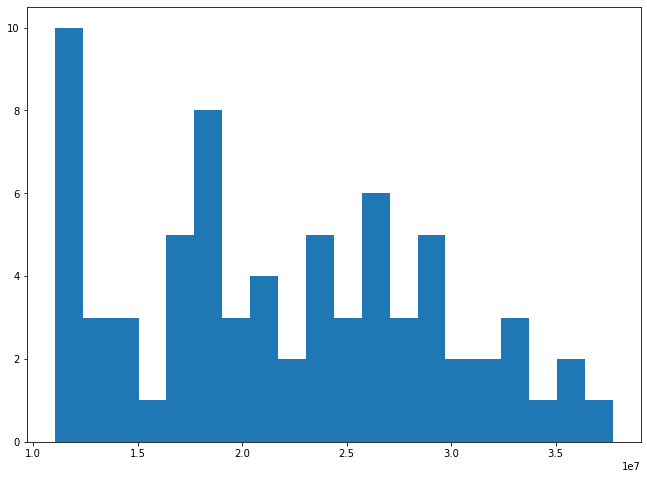

In [166]:
plt.hist(train_y, bins = 20)
plt.show()

In [167]:
collist_X = ['BPS_CAB', 'BPS_IND','PCT_HS_DIPLOMA','TOTPOT_2018', 'STORE_SQFT']

for var in collist_X:
    name = var + '_cbrt'
    train_X[name] = np.cbrt(train_X[var])
    val_X[name] = np.cbrt(val_X[var])
    test_X[name] = np.cbrt(test_X[var])
    name = var + '_sq'
    train_X[name] = np.power(train_X[var], 2)
    val_X[name] = np.power(val_X[var], 2)
    test_X[name] = np.power(test_X[var], 2)
    name = var + '_log'
    train_X[name] = np.log(train_X[var]+1)
    val_X[name] = np.log(val_X[var]+1)
    test_X[name] = np.log(test_X[var]+1)
    
collist_X_expanded = list(train_X.columns.values)


#imr = SimpleImputer(strategy='median')
#imr = imr.fit(train_X)

#train_X = pd.DataFrame(imr.transform(train_X.values), columns = collist_X)
#val_X = pd.DataFrame(imr.transform(val_X.values), columns = collist_X)
#test_X = pd.DataFrame(imr.transform(test_X.values), columns = collist_X)

#stdsc = StandardScaler()
#stdsc.fit(train_X)

#train_X = pd.DataFrame(stdsc.transform(train_X), columns = collist_X_expanded)
#val_X = pd.DataFrame(stdsc.transform(val_X), columns = collist_X_expanded)
#test_X = pd.DataFrame(stdsc.transform(test_X), columns = collist_X_expanded)




In [168]:
missing_df = train_X.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df['missing_ratio'] = missing_df['missing_count'] / train_X.shape[0]
missing_df.loc[missing_df['missing_ratio']>0.01]


,column_name,missing_count,missing_ratio


Anderson-Darling: 0.7282842767428406 Critical Value: 0.749 
train_y is normally distributed


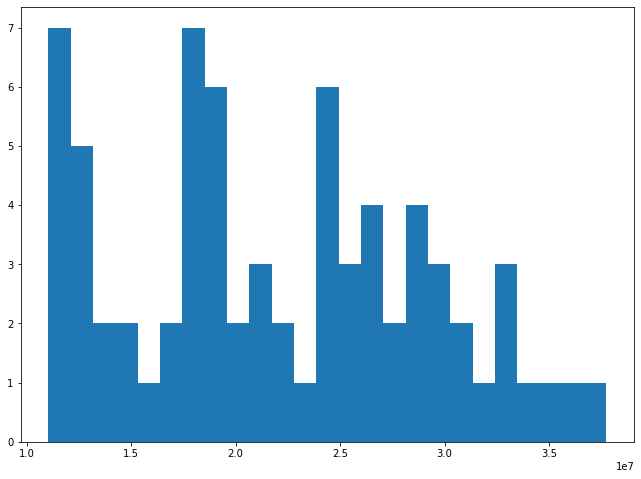

In [169]:
stat, cv, sig = stats.anderson(train_y, 'norm')
print('Anderson-Darling: {} Critical Value: {} '.format(stat, cv[2]))
if stat > cv[2]:
    print('train_y is not normally distributed')
else:
    print('train_y is normally distributed')
plt.hist(train_y, bins=25)
plt.show()

In [171]:
matplotlib.rcParams['figure.figsize'] = (5,2)

#collist_X_expanded.remove('VISITS_LT_sqrt')
#collist_X_expanded.remove('YOY_TREND_log')


train_X = train_X[collist_X_expanded]

collist_X_expanded = sorted(collist_X_expanded, key=str.lower)

varlist = []

for var in collist_X_expanded: 
    vardf = train_X[var]
    #print(vardf.head())
    coef, pval = stats.pearsonr(vardf.to_numpy(), train_y)
    if pval < 10:
        varlist.append(var)
        print('%50s Corr Coef: %7s - pval:  %.4f' % (var, str(round(coef,2)), pval))
    #plt.hist(train_X[var], bins = 100)
    #plt.show()
    
#print(varlist)
    
matplotlib.rcParams['figure.figsize'] = (11,8)

                                           BPS_CAB Corr Coef:     0.0 - pval:  0.9885
                                      BPS_CAB_cbrt Corr Coef:   -0.03 - pval:  0.8008
                                       BPS_CAB_log Corr Coef:   -0.02 - pval:  0.8758
                                        BPS_CAB_sq Corr Coef:    0.06 - pval:  0.6305
                                           BPS_IND Corr Coef:   -0.16 - pval:  0.1796
                                      BPS_IND_cbrt Corr Coef:   -0.16 - pval:  0.1796
                                       BPS_IND_log Corr Coef:   -0.16 - pval:  0.1796
                                        BPS_IND_sq Corr Coef:   -0.16 - pval:  0.1796
                                    PCT_HS_DIPLOMA Corr Coef:   -0.03 - pval:  0.8308
                               PCT_HS_DIPLOMA_cbrt Corr Coef:   -0.05 - pval:  0.6902
                                PCT_HS_DIPLOMA_log Corr Coef:   -0.03 - pval:  0.7973
                                 PCT_HS_DIPLOMA_sq Cor

In [172]:
collist_X_expanded = ['BPS_CAB', 'BPS_IND','PCT_HS_DIPLOMA','STORE_SQFT','TOTPOT_2018']
train_X = train_X[collist_X_expanded]

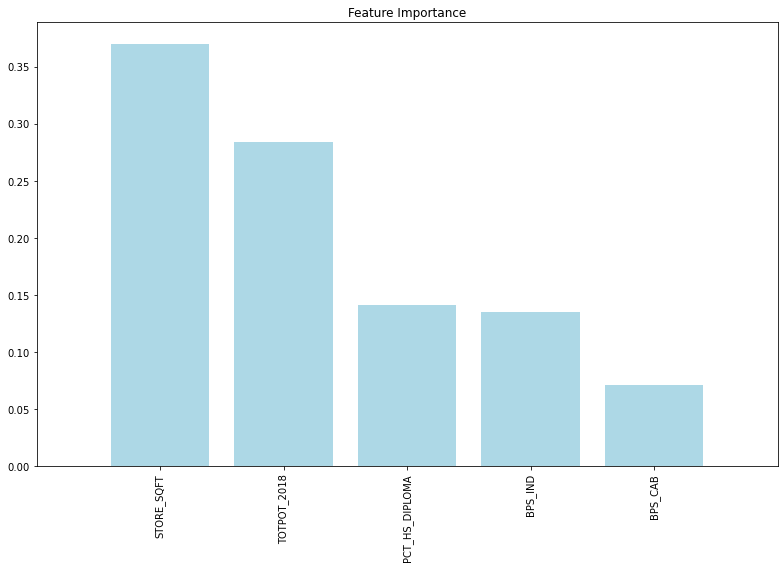

In [173]:
feat_labels = np.asarray(collist_X_expanded)

forests = RandomForestRegressor(n_estimators=500,
                                random_state=0,
                                n_jobs=-1)
forests.fit(train_X, train_y)
importances = forests.feature_importances_
indices = np.argsort(importances)[::-1]
# for f in range(train_X2.shape[1]):
#     print("%2d) %-*s %f" % (f + 1, 30, feat_labels[indices[f]],
#                                       importances[indices[f]]))
    
plt.title('Feature Importance')
plt.bar(range(train_X.shape[1]), importances[indices], color='lightblue', align='center')
plt.xticks(range(train_X.shape[1]), feat_labels[indices], rotation=90)
plt.xlim([-1, train_X.shape[1]])
plt.tight_layout()
plt.show()

In [174]:
slct = SelectKBest(f_regression, k=5)
slct.fit(train_X, train_y)
selected = slct.get_support()
feat_labels2 = feat_labels[selected]
feat_labels2

array(['BPS_CAB', 'BPS_IND', 'PCT_HS_DIPLOMA', 'STORE_SQFT',
       'TOTPOT_2018'], dtype='<U14')

   VIF Factor         feature
3   13.194371      STORE_SQFT
2    5.347466  PCT_HS_DIPLOMA
1    4.481249         BPS_IND
4    3.437571     TOTPOT_2018
0    1.788366         BPS_CAB


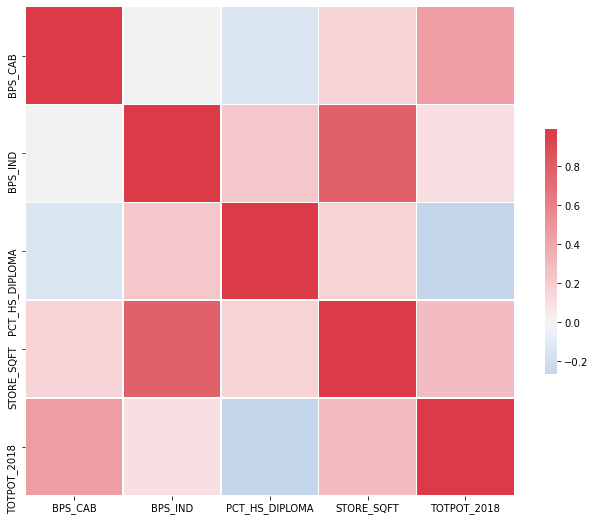

In [175]:
collist_X2 = ['BPS_CAB', 'BPS_IND', 'PCT_HS_DIPLOMA', 'STORE_SQFT',
       'TOTPOT_2018']

#collist_X2 = feat_labels2.tolist()

train_X2 = train_X[collist_X2]
    
corr = train_X2.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(250, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr,  cmap=cmap, vmax=.99, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


print(helper.calc_VIFs(train_X2))

In [176]:
import statsmodels.api as sm

mod = sm.OLS(train_y, train_X2)
res = mod.fit()
print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.940
Model:                            OLS   Adj. R-squared (uncentered):              0.936
Method:                 Least Squares   F-statistic:                              211.7
Date:                Tue, 25 Aug 2020   Prob (F-statistic):                    1.27e-39
Time:                        15:55:25   Log-Likelihood:                         -1221.6
No. Observations:                  72   AIC:                                      2453.
Df Residuals:                      67   BIC:                                      2465.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

In [177]:
y_true3, y_pred3 = train_y, res.predict(train_X[collist_X2].values)
y_true, y_pred = val_y, res.predict(val_X[collist_X2].values)
y_true2, y_pred2 = test_y, res.predict(test_X[collist_X2].values)
print('R2 Train: ' + str(r2_score(y_true3, y_pred3)))
print('R2 Val: ' + str(r2_score(y_true, y_pred)))

R2 Train: 0.37309198865752935
R2 Val: 0.18689801969886677


In [178]:
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(train_X2.values, train_y)

train_y_pred = regr.predict(train_X2.values)
val_y_pred = regr.predict(val_X[collist_X2].values)
test_y_pred = regr.predict(test_X[collist_X2].values)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.4f'
      % mean_squared_error(val_y, val_y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Train Coefficient of determination: %.4f'
      % r2_score(train_y, train_y_pred))
print('Val Coefficient of determination: %.4f'
      % r2_score(val_y, val_y_pred))
print('Test Coefficient of determination: %.4f'
      % r2_score(test_y, test_y_pred))

Coefficients: 
 [-2.84454852e+06 -1.03493994e+07  2.91619119e+07  9.84404672e+01
  3.93647376e+00]
Mean squared error: 28179229862465.9492
Train Coefficient of determination: 0.4286
Val Coefficient of determination: 0.2497
Test Coefficient of determination: -0.1300


In [179]:
param_test1 = {
     'learning_rate':uniform(0.01,0.09),
     'max_depth':list(range(5,20)),
     'min_child_weight':list(range(1,10)),
     'colsample_bytree': uniform(0.1,0.99),
     'subsample': uniform(0.1,0.99),
     'reg_alpha': uniform(0.1, 0.9),
     'reg_lambda': uniform(0.1, 0.9),
     'objective':['reg:squarederror'],
     'gamma':uniform(0.1, 5.0),
     'n_estimators':range(10,200,2),
     #'booster':['gblinear'],
     'booster':['gbtree'],
     'feature_selector':['cyclic','shuffle','random']
}


gsearch1 = RandomizedSearchCV(estimator = xgb.XGBRegressor(), 
                              param_distributions = param_test1, 
                              scoring='neg_mean_squared_error',
                              n_jobs=-1,
                              n_iter=2000,
                              cv=5)
start = time()
gsearch1.fit(train_X2.values, train_y)

print("Parameter search took %.2f seconds for %d candidate parameter settings."
      % (time() - start, len(gsearch1.cv_results_['params'])))

helper.report(gsearch1) 

Parameter search took 37.94 seconds for 2000 candidate parameter settings.
Best Mean validation score: -26921632931528.242 (std: nan)
Parameters: {'booster': 'gbtree', 'colsample_bytree': 0.8869029349768421, 'feature_selector': 'shuffle', 'gamma': 4.60409780260729, 'learning_rate': 0.07899999070695632, 'max_depth': 17, 'min_child_weight': 9, 'n_estimators': 154, 'objective': 'reg:squarederror', 'reg_alpha': 0.9841607133324347, 'reg_lambda': 0.7456902183153057, 'subsample': 0.5927081958084135}


In [180]:


bestpar = gsearch1.best_params_

tuned_model = xgb.XGBRegressor( booster = bestpar['booster'],
                               colsample_bytree = bestpar['colsample_bytree'],
                               feature_selector = bestpar['feature_selector'],
                               gamma = bestpar['gamma'],
                               learning_rate = bestpar['learning_rate'],
                               max_depth = bestpar['max_depth'],
                               min_child_weight = bestpar['min_child_weight'],
                               n_estimators = bestpar['n_estimators'],
                               objective = bestpar['objective'],
                               reg_alpha = bestpar['reg_alpha'],
                               reg_lambda = bestpar['reg_lambda'],
                               subsample = bestpar['subsample'])

xgbmodel = tuned_model.fit(train_X2.values, train_y, 
                 eval_set=[(train_X2.values, train_y), (val_X[collist_X2].values, val_y), (test_X[collist_X2].values, test_y)], 
                 eval_metric='rmse',
                 early_stopping_rounds=10,                 
                 verbose=True)


[0]	validation_0-rmse:2.15565e+07	validation_1-rmse:1.9409e+07	validation_2-rmse:1.96366e+07
Multiple eval metrics have been passed: 'validation_2-rmse' will be used for early stopping.

Will train until validation_2-rmse hasn't improved in 10 rounds.
[1]	validation_0-rmse:2.00387e+07	validation_1-rmse:1.7874e+07	validation_2-rmse:1.80992e+07
[2]	validation_0-rmse:1.86194e+07	validation_1-rmse:1.65315e+07	validation_2-rmse:1.68424e+07
[3]	validation_0-rmse:1.72864e+07	validation_1-rmse:1.51579e+07	validation_2-rmse:1.54744e+07
[4]	validation_0-rmse:1.60811e+07	validation_1-rmse:1.39639e+07	validation_2-rmse:1.42872e+07
[5]	validation_0-rmse:1.50874e+07	validation_1-rmse:1.29716e+07	validation_2-rmse:1.32592e+07
[6]	validation_0-rmse:1.41643e+07	validation_1-rmse:1.20646e+07	validation_2-rmse:1.22906e+07
[7]	validation_0-rmse:1.32031e+07	validation_1-rmse:1.1093e+07	validation_2-rmse:1.12766e+07
[8]	validation_0-rmse:1.23611e+07	validation_1-rmse:1.02427e+07	validation_2-rmse:1.03749e+0

In [119]:
y_true, y_pred = train_y, xgbmodel.predict(train_X2.values, ntree_limit = xgbmodel.best_ntree_limit)
                                         
r2 = r2_score(y_true, y_pred)                                  
r2

0.34248657228215507

In [120]:
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()
y_true3, y_pred3 = train_y, xgbmodel.predict(train_X[collist_X2].values, ntree_limit = xgbmodel.best_ntree_limit)
y_true, y_pred = val_y, xgbmodel.predict(val_X[collist_X2].values, ntree_limit = xgbmodel.best_ntree_limit)
y_true2, y_pred2 = test_y, xgbmodel.predict(test_X[collist_X2].values, ntree_limit = xgbmodel.best_ntree_limit)

#y_true3, y_pred3 = train_y, xgbmodel.predict(train_X[collist_X2].values, ntree_limit = 0)
#y_true, y_pred = val_y, xgbmodel.predict(val_X[collist_X2].values, ntree_limit = 0)
#y_true2, y_pred2 = test_y, xgbmodel.predict(test_X[collist_X2].values, ntree_limit = 0)
print('R2 Train: ' + str(r2_score(y_true3, y_pred3)))
print('R2 Val: ' + str(r2_score(y_true, y_pred)))
print('R2 Test: ' + str(r2_score(y_true2, y_pred2)))

rmse = math.sqrt(mean_squared_error(y_true3, y_pred3))
print('RMSE Train: ' + str(rmse))
rmse = math.sqrt(mean_squared_error(y_true, y_pred))
print('RMSE Val: ' + str(rmse))
rmse = math.sqrt(mean_squared_error(y_true2, y_pred2))
print('RMSE Test: ' + str(rmse))

rmse = mean_absolute_error(y_true3, y_pred3)
print('MAE Train: ' + str(rmse))
rmse = mean_absolute_error(y_true, y_pred)
print('MAE Val: ' + str(rmse))
rmse = mean_absolute_error(y_true2, y_pred2)
print('MAE Test: ' + str(rmse))

The model is trained on the full development set.
The scores are computed on the full evaluation set.

R2 Train: 0.34248657228215507
R2 Val: 0.24083018286171765
R2 Test: 0.021090826406725327
RMSE Train: 24.352417245399472
RMSE Val: 25.253366278306935
RMSE Test: 27.498661987361533
MAE Train: 20.826605699046997
MAE Val: 22.05480386553459
MAE Test: 20.513585501609626


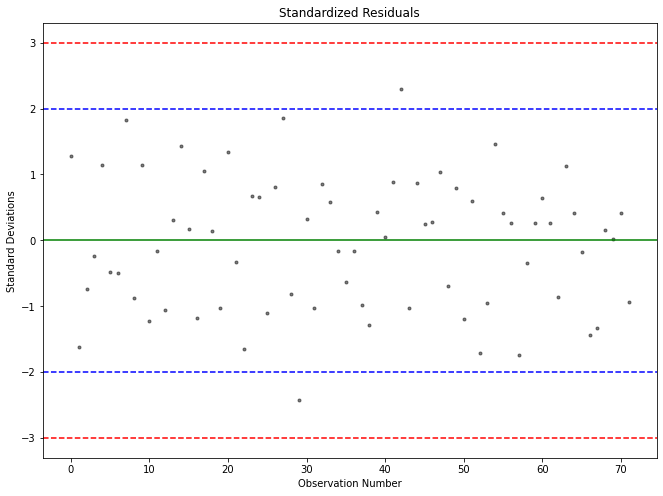

In [181]:
plotdata = pd.DataFrame({'true':y_true3.tolist(),'pred':y_pred3.tolist()})
plotdata['resid'] = plotdata['pred']-plotdata['true']
plotdata['stdresid'] = plotdata['resid']/np.std(plotdata['resid'])

plt.plot(plotdata['stdresid'], '.', alpha = 0.5, color='black')
plt.axhline(y=0, color = 'green')
plt.axhline(y=2, color = 'blue', linestyle='--')
plt.axhline(y=-2, color = 'blue', linestyle='--')
plt.axhline(y=3, color = 'red', linestyle='--')
plt.axhline(y=-3, color = 'red', linestyle='--')

plt.title('Standardized Residuals')
plt.ylabel('Standard Deviations')
plt.xlabel('Observation Number')
plt.show()

In [183]:
def un_cbrt(y_test, y_pred):
    '''
    Convert values back to actual dollar values.
    
    INPUTS:
        - y_test
        - y_predictions
    OUTPUT:
        - converted y_test
        - converted y_predictions
    '''
    return np.power(y_test,3), np.power(y_pred,3)

def un_log(y_test, y_pred):
    '''
    Convert values back to actual dollar values from log values.
    
    INPUTS:
        - y_test
        - y_predictions
    OUTPUT:
        - converted y_test
        - converted y_predictions
    '''
    return np.exp(y_test), np.exp(y_pred)




def get_prediction_interval(y_test, test_predictions, pi=.95):
    '''
    Get a prediction interval for a linear regression.
    
    INPUTS: 
        - Single prediction, 
        - y_test
        - All test set predictions,
        - Prediction interval threshold (default = .95) 
    OUTPUT: 
        - Prediction interval for single prediction
    '''
    
    #get standard deviation of y_test
    sum_errs = np.sum((y_test - test_predictions)**2)
    stdev = np.sqrt(1 / (len(y_test) - 2) * sum_errs)
#get interval from standard deviation
    one_minus_pi = 1 - pi
    ppf_lookup = 1 - (one_minus_pi / 2)
    z_score = stats.norm.ppf(ppf_lookup)
    interval = z_score * stdev
#generate prediction interval lower and upper bound
    return interval

In [184]:
y_true_conv, y_pred_conv = un_cbrt(y_true3, y_pred3)

get_prediction_interval(y_true_conv, y_pred_conv)

2.1058222503813544e+22

In [186]:
param_test2 = {
     'alpha':uniform(0.01,0.99),
     'l1_ratio':uniform(0.01,0.99),
     'fit_intercept':[True],
     'normalize':[True, False],
     'selection':['cyclic','random']
}


gsearch2 = RandomizedSearchCV(estimator = ElasticNet(), 
                              param_distributions = param_test2, 
                              scoring='neg_mean_squared_error',
                              n_jobs=-1,
                              n_iter=2000,
                              cv=5)
start = time()
gsearch2.fit(train_X2.values, train_y)

print("Parameter search took %.2f seconds for %d candidate parameter settings."
      % (time() - start, len(gsearch2.cv_results_['params'])))

helper.report(gsearch2) 

Parameter search took 3.23 seconds for 2000 candidate parameter settings.
Best Mean validation score: -35034586245373.977 (std: 5989569443452.157)
Parameters: {'alpha': 0.09151827101535652, 'fit_intercept': True, 'l1_ratio': 0.5582026996726094, 'normalize': False, 'selection': 'random'}


In [188]:
tuned_net = ElasticNet(alpha = 0.02144,
                       l1_ratio = 0.0915,
                       normalize = True,
                       selection='random')

enet_model = tuned_net.fit(train_X2.values, train_y)


In [189]:
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()

y_true3, y_pred3 = train_y, enet_model.predict(train_X[collist_X2].values)
y_true, y_pred = val_y, enet_model.predict(val_X[collist_X2].values)
y_true2, y_pred2 = test_y, enet_model.predict(test_X[collist_X2].values)
print('R2 Train: ' + str(r2_score(y_true3, y_pred3)))
print('R2 Val: ' + str(r2_score(y_true, y_pred)))
print('R2 Test: ' + str(r2_score(y_true2, y_pred2)))

rmse = math.sqrt(mean_squared_error(y_true3, y_pred3))
print('RMSE Train: ' + str(rmse))
rmse = math.sqrt(mean_squared_error(y_true, y_pred))
print('RMSE Val: ' + str(rmse))
rmse = math.sqrt(mean_squared_error(y_true2, y_pred2))
print('RMSE Test: ' + str(rmse))

rmse = mean_absolute_error(y_true3, y_pred3)
print('MAE Train: ' + str(rmse))
rmse = mean_absolute_error(y_true, y_pred)
print('MAE Val: ' + str(rmse))
rmse = mean_absolute_error(y_true2, y_pred2)
print('MAE Test: ' + str(rmse))

The model is trained on the full development set.
The scores are computed on the full evaluation set.

R2 Train: 0.18009370625089316
R2 Val: 0.12584608052843893
R2 Test: 0.2319263640672251
RMSE Train: 6461766.204100549
RMSE Val: 5729947.521184134
RMSE Test: 5035036.979054423
MAE Train: 5539072.096685444
MAE Val: 4827248.850010545
MAE Test: 4168583.5051334137


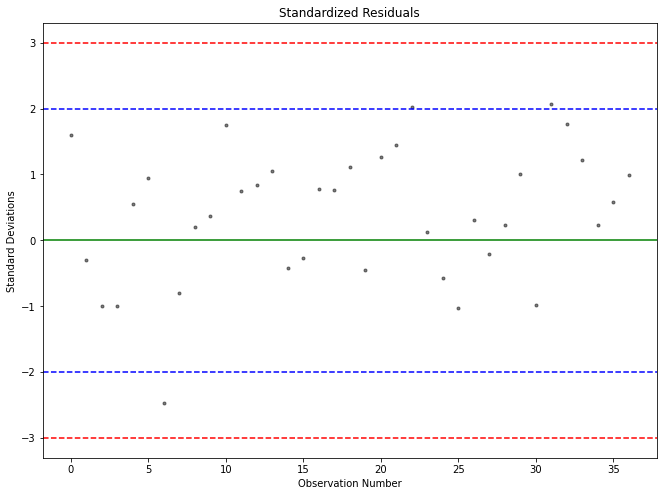

In [190]:
plotdata = pd.DataFrame({'true':y_true.tolist(),'pred':y_pred.tolist()})
plotdata['resid'] = plotdata['pred']-plotdata['true']
plotdata['stdresid'] = plotdata['resid']/np.std(plotdata['resid'])

plt.plot(plotdata['stdresid'], '.', alpha = 0.5, color='black')
plt.axhline(y=0, color = 'green')
plt.axhline(y=2, color = 'blue', linestyle='--')
plt.axhline(y=-2, color = 'blue', linestyle='--')
plt.axhline(y=3, color = 'red', linestyle='--')
plt.axhline(y=-3, color = 'red', linestyle='--')

plt.title('Standardized Residuals')
plt.ylabel('Standard Deviations')
plt.xlabel('Observation Number')
plt.show()

In [192]:
y_true_conv, y_pred_conv = y_true3, y_pred3

get_prediction_interval(y_true_conv, y_pred_conv)

12844480.974784635

In [193]:
enet_model.coef_

array([-3.69918819e+05, -1.50088924e+06,  2.47886622e+06,  1.42284864e+01,
        1.45139899e+00])